# <span style="color:blue"> Laboratorio di simulazione numerica (LSN) </span>

## <span style="color:green">  Esercitazione numerica 4</span>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

La quarta esercitazione è incentrata sulla simulazione di dinamica molecolare. In particolare abbiamo simulato un sistema ad $N$ particelle nell'ensamble *microcanonico* (NVE) con condizioni periodiche al contorno (PBC), in cui l'interazione tra particelle è governata dal potenziale di Lennard-Jones.

In questa esercitazione era richiesto:

- migliorare il codice di dinamica molecolare (MD) fornito implementando la possibilità di ripartire da due configurazioni spaziali precedentemente generate (*config.0* e *old.0*) e di riscalare le velocità in modo che combacino una temperatura desiderata.
- implementare il calcolo dei valori medi, con relative incertezze, per le energie $E/N$, $U/N$, $K/N$ e per la temperatura, usando il metodo a blocchi.
- produrre grafici dei valori medi con relative incertezze per tutte le quantità nel SI per l'Argon in 3 fasi diverse.

I parametri per la conversione nel SI per l'Argon sono:
- $\sigma=0.34$nm
- $\epsilon/k_B=120$K
- $m=39.948$amu

Tutte le configurazioni iniziali delle simulazioni sono state ottenute facendo una o più simulazioni preliminari in modo da partire da configurazioni in grado di rimanere in ragionevole prossimità della temperatura richiesta durante la misura.

Per prima cosa mostro come restart successivi permettano di avvicinarsi alla temperatura desiderata ($T^*=0.8$ in questo caso) ad ogni restart.

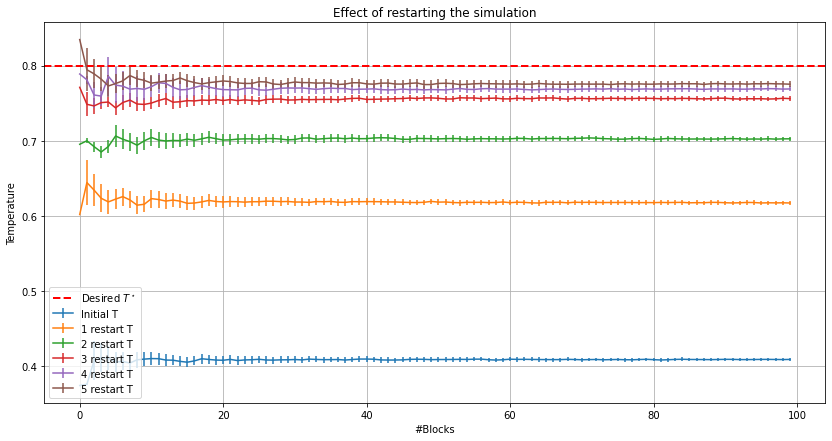

In [38]:
blocks=np.arange(0,100) 
prog_average_t1, prog_average_err_t1  = np.loadtxt("../results/restart_effect/temp1.dat", delimiter = " ", unpack = True)
prog_average_t2, prog_average_err_t2  = np.loadtxt("../results/restart_effect/temp2.dat", delimiter = " ", unpack = True)
prog_average_t3, prog_average_err_t3  = np.loadtxt("../results/restart_effect/temp3.dat", delimiter = " ", unpack = True)
prog_average_t4, prog_average_err_t4  = np.loadtxt("../results/restart_effect/temp4.dat", delimiter = " ", unpack = True)
prog_average_t5, prog_average_err_t5  = np.loadtxt("../results/restart_effect/temp5.dat", delimiter = " ", unpack = True)
prog_average_t6, prog_average_err_t6  = np.loadtxt("../results/restart_effect/temp6.dat", delimiter = " ", unpack = True)

plt.figure(figsize=(14,7))

plt.errorbar(blocks, prog_average_t1, yerr=prog_average_err_t1, label='Initial T')
plt.errorbar(blocks, prog_average_t2, yerr=prog_average_err_t2, label='1 restart T')
plt.errorbar(blocks, prog_average_t3, yerr=prog_average_err_t3, label='2 restart T')
plt.errorbar(blocks, prog_average_t4, yerr=prog_average_err_t4, label='3 restart T')
plt.errorbar(blocks, prog_average_t5, yerr=prog_average_err_t5, label='4 restart T')
plt.errorbar(blocks, prog_average_t6, yerr=prog_average_err_t6, label='5 restart T')
plt.axhline(y=0.8, label='Desired $T^\star$', 
            color='red', linestyle='--',linewidth=2)
plt.title('Effect of restarting the simulation')
plt.xlabel('#Blocks')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)

plt.show()




La routine sembra funzionare adeguatamente.

In [31]:

# Conversione nel SI
k_b=1.380649e-23
a_m_u=1.66054e-27

sigma_ar=0.34e-9
epsilon_ar=120.*k_b
m_ar=39.948*a_m_u

delta=0.0005

time_step_ar=delta*np.sqrt(m_ar*sigma_ar*sigma_ar/epsilon_ar)

### Esercizio 4.3

**Argon allo stato solido**

In [39]:
eqsteps=1000
nblocks=100
nsteps_per_block=100

time_ar=(eqsteps+nblocks*nsteps_per_block)*time_step_ar

print("Argon simulation time: ", time_ar, " s")

Argon simulation time:  1.1832636784047639e-11  s


 La simulazione della fase solida ($T^*=0.8$,$\rho^*=1.1$, $r_c=2.2$) è stata effettuata coi seguenti parametri:
 
 - 1000 step di calibrazione
 - 100 blocchi
 - 100 step per blocco
 - 108 particelle
 
 Con un passo di integrazione di $0.0005$ il tempo totale simulato in unità del SI risulta essere $11.8$ps.
 Di seguito riporto i risultati ottenuti.

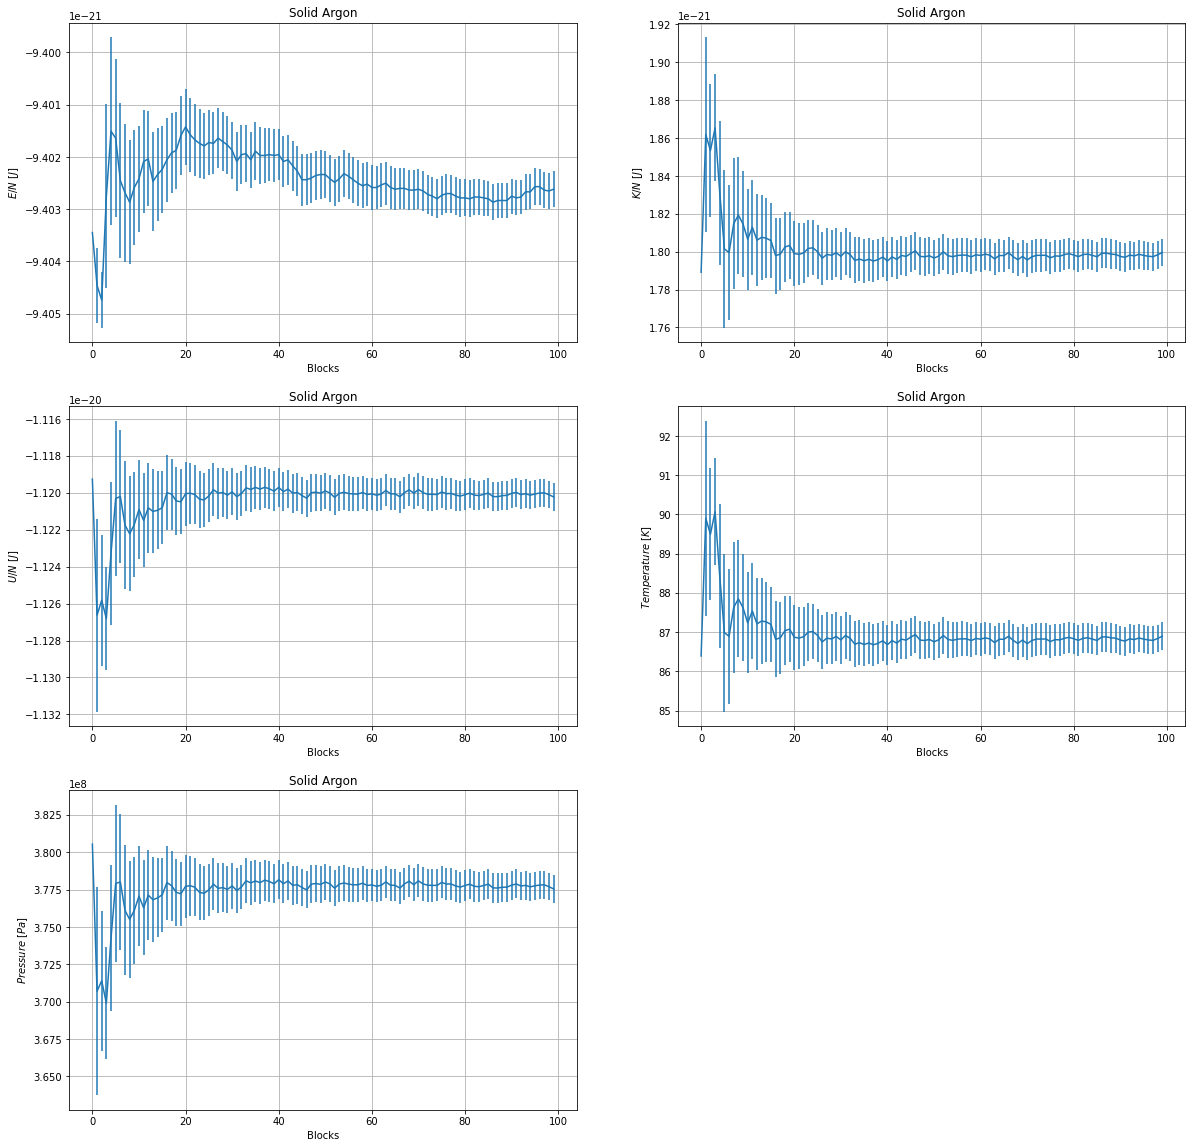

In [34]:
blocks=np.arange(0,100) 
prog_average_e_tot, prog_average_err_e_tot  = np.loadtxt("../results/solid/ave_etot.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_e_pot, prog_average_err_e_pot  = np.loadtxt("../results/solid/ave_epot.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_e_kin, prog_average_err_e_kin  = np.loadtxt("../results/solid/ave_ekin.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_temp, prog_average_err_temp  = np.loadtxt("../results/solid/ave_temp.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_pres, prog_average_err_pres  = np.loadtxt("../results/solid/ave_pres.out", delimiter = "   ", unpack = True, usecols=(1,2))

prog_average_e_tot=prog_average_e_tot*epsilon_ar
prog_average_e_kin=prog_average_e_kin*epsilon_ar
prog_average_e_pot=prog_average_e_pot*epsilon_ar
prog_average_temp=prog_average_temp*epsilon_ar/k_b
prog_average_pres=prog_average_pres*epsilon_ar/(sigma_ar**3)

prog_average_err_e_tot=prog_average_err_e_tot*epsilon_ar
prog_average_err_e_kin=prog_average_err_e_kin*epsilon_ar
prog_average_err_e_pot=prog_average_err_e_pot*epsilon_ar
prog_average_err_temp=prog_average_err_temp*epsilon_ar/k_b
prog_average_err_pres=prog_average_err_pres*epsilon_ar/(sigma_ar**3)

plt.figure(figsize=(20,20))

plt.subplot(321)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$E/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_tot, prog_average_err_e_tot)
plt.grid(True)

plt.subplot(322)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$K/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_kin, prog_average_err_e_kin)
plt.grid(True)

plt.subplot(323)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_pot, prog_average_err_e_pot)
plt.grid(True)

plt.subplot(324)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Temperature$ $[K]$')
plt.errorbar(blocks, prog_average_temp, prog_average_err_temp)
plt.grid(True)

plt.subplot(325)
plt.title("Solid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(blocks, prog_average_pres, prog_average_err_pres)
plt.grid(True)

plt.show()

**Argon liquido**

Per simulare la fase liquida ($T^*=1.1$,$\rho^*=0.8$, $r_c=2.5$) ho usato gli stessi parametri precendenti.

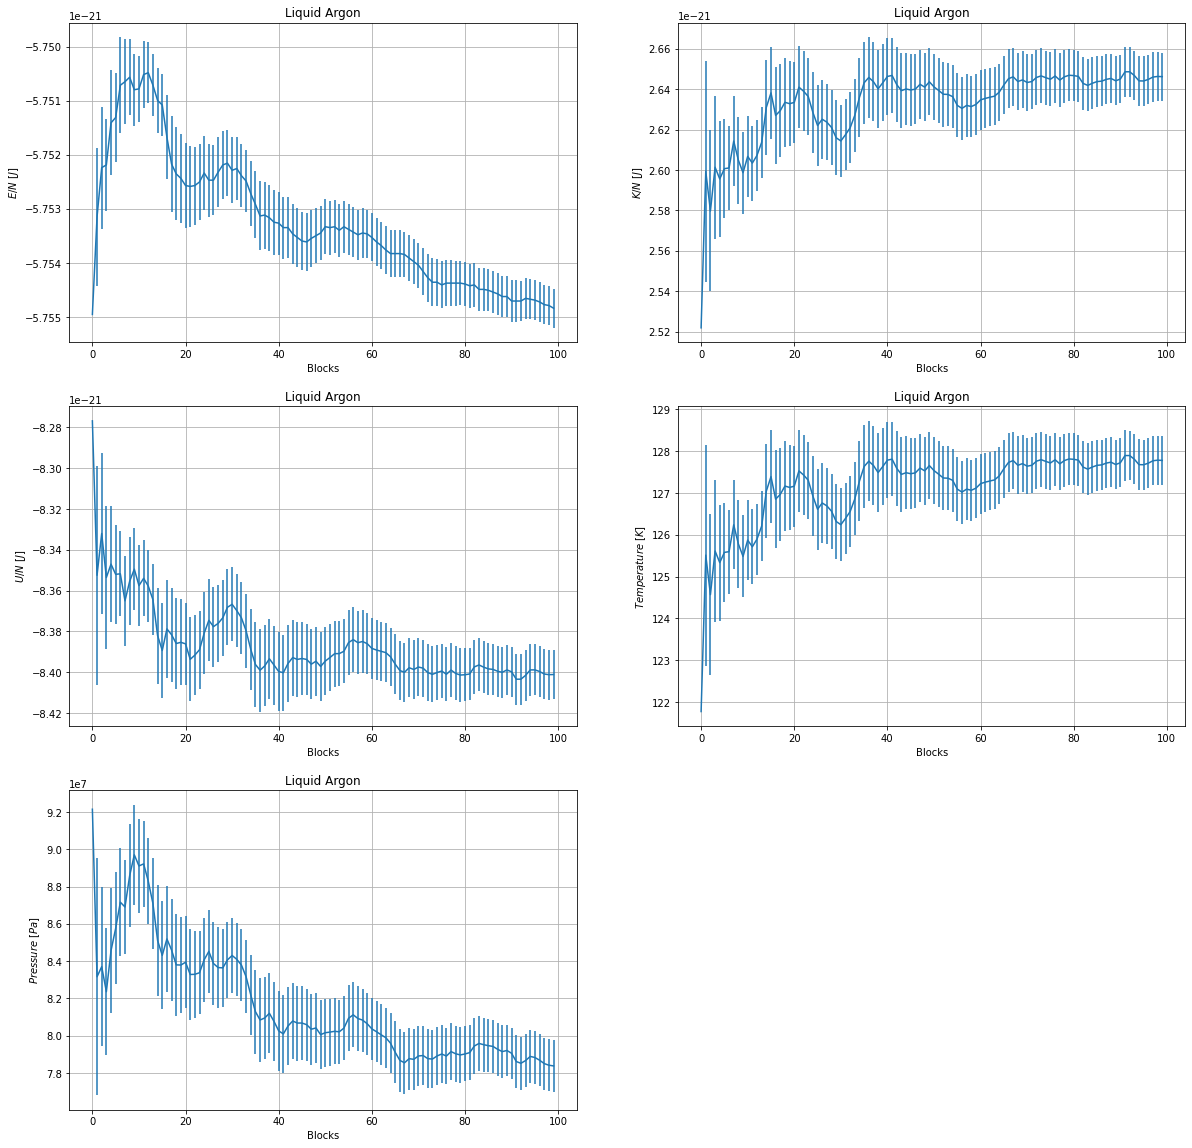

In [35]:

blocks=np.arange(0,100) 
prog_average_e_tot, prog_average_err_e_tot  = np.loadtxt("../results/liquid/ave_etot.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_e_pot, prog_average_err_e_pot  = np.loadtxt("../results/liquid/ave_epot.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_e_kin, prog_average_err_e_kin  = np.loadtxt("../results/liquid/ave_ekin.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_temp, prog_average_err_temp  = np.loadtxt("../results/liquid/ave_temp.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_pres, prog_average_err_pres  = np.loadtxt("../results/liquid/ave_pres.out", delimiter = "   ", unpack = True, usecols=(1,2))

prog_average_e_tot=prog_average_e_tot*epsilon_ar
prog_average_e_kin=prog_average_e_kin*epsilon_ar
prog_average_e_pot=prog_average_e_pot*epsilon_ar
prog_average_temp=prog_average_temp*epsilon_ar/k_b
prog_average_pres=prog_average_pres*epsilon_ar/(sigma_ar**3)

prog_average_err_e_tot=prog_average_err_e_tot*epsilon_ar
prog_average_err_e_kin=prog_average_err_e_kin*epsilon_ar
prog_average_err_e_pot=prog_average_err_e_pot*epsilon_ar
prog_average_err_temp=prog_average_err_temp*epsilon_ar/k_b
prog_average_err_pres=prog_average_err_pres*epsilon_ar/(sigma_ar**3)

plt.figure(figsize=(20,20))

plt.subplot(321)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$E/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_tot, prog_average_err_e_tot)
plt.grid(True)
plt.subplot(322)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$K/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_kin, prog_average_err_e_kin)
plt.grid(True)

plt.subplot(323)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_pot, prog_average_err_e_pot)
plt.grid(True)

plt.subplot(324)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Temperature$ $[K]$')
plt.errorbar(blocks, prog_average_temp, prog_average_err_temp)
plt.grid(True)

plt.subplot(325)
plt.title("Liquid Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(blocks, prog_average_pres, prog_average_err_pres)
plt.grid(True)

plt.show()

**Argon gassoso**

Per la fase gassosa ($T^*=1.2$,$\rho^*=0.05$, $r_c=5.0$) ho di nuovo usato gli stessi parametri nella simulazione.

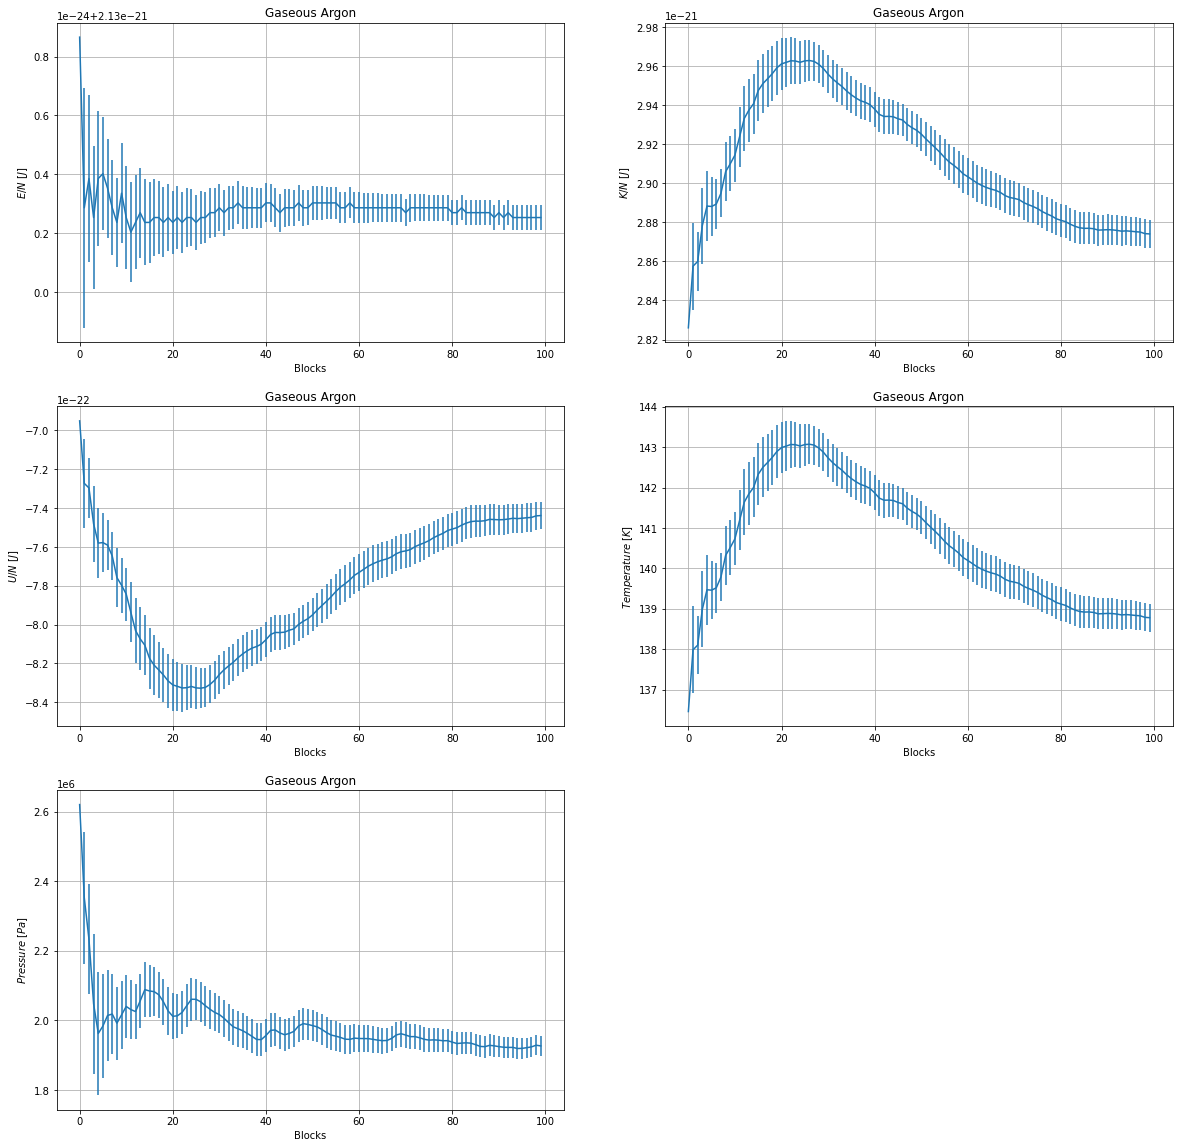

In [36]:
blocks=np.arange(0,100) 
prog_average_e_tot, prog_average_err_e_tot  = np.loadtxt("../results/gas/ave_etot.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_e_pot, prog_average_err_e_pot  = np.loadtxt("../results/gas/ave_epot.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_e_kin, prog_average_err_e_kin  = np.loadtxt("../results/gas/ave_ekin.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_temp, prog_average_err_temp  = np.loadtxt("../results/gas/ave_temp.out", delimiter = "   ", unpack = True, usecols=(1,2))
prog_average_pres, prog_average_err_pres  = np.loadtxt("../results/gas/ave_pres.out", delimiter = "   ", unpack = True, usecols=(1,2))

prog_average_e_tot=prog_average_e_tot*epsilon_ar
prog_average_e_kin=prog_average_e_kin*epsilon_ar
prog_average_e_pot=prog_average_e_pot*epsilon_ar
prog_average_temp=prog_average_temp*epsilon_ar/k_b
prog_average_pres=prog_average_pres*epsilon_ar/(sigma_ar**3)

prog_average_err_e_tot=prog_average_err_e_tot*epsilon_ar
prog_average_err_e_kin=prog_average_err_e_kin*epsilon_ar
prog_average_err_e_pot=prog_average_err_e_pot*epsilon_ar
prog_average_err_temp=prog_average_err_temp*epsilon_ar/k_b
prog_average_err_pres=prog_average_err_pres*epsilon_ar/(sigma_ar**3)

plt.figure(figsize=(20,20))
plt.subplot(321)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$E/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_tot, prog_average_err_e_tot)
plt.grid(True)

plt.subplot(322)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$K/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_kin, prog_average_err_e_kin)
plt.grid(True)

plt.subplot(323)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$U/N$ $[J]$')
plt.errorbar(blocks, prog_average_e_pot, prog_average_err_e_pot)
plt.grid(True)

plt.subplot(324)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$Temperature$ $[K]$')
plt.errorbar(blocks, prog_average_temp, prog_average_err_temp)
plt.grid(True)

plt.subplot(325)
plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.ylabel('$Pressure$ $[Pa]$')
plt.errorbar(blocks, prog_average_pres, prog_average_err_pres)
plt.grid(True)

plt.show()


L'energia totale $E/N$ a prima vista non sembra conservarsi. Plottiamola quindi assieme ad energia cinetica e potenziale:

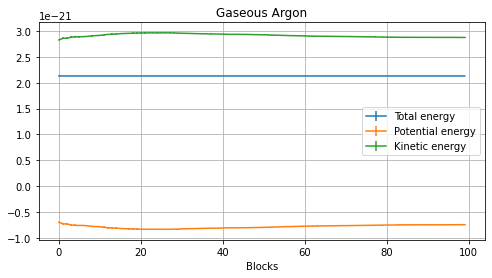

In [40]:
plt.figure(figsize=(8,4))

plt.title("Gaseous Argon")
plt.xlabel('Blocks')
plt.errorbar(blocks, prog_average_e_tot, prog_average_err_e_tot, label='Total energy')
plt.errorbar(blocks, prog_average_e_pot, prog_average_err_e_pot, label='Potential energy')
plt.errorbar(blocks, prog_average_e_kin, prog_average_err_e_kin, label='Kinetic energy')
plt.legend()
plt.grid(True)

plt.show()

Da questo grafico si vede chiaramente che le fluttuazioni che osservavamo nell'altro grafico sono solo su piccola scala e possiamo quindi affermare che l'energia totale è conservata.